In [24]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pylab as plt

In [25]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 300, bias=False),
            nn.Sigmoid(),
            nn.Linear(300, 10, bias=False)
        )
    
    def forward(self, x):
        return self.layers(x)

In [26]:
torch.manual_seed(3)

In [27]:
train_dataset = MNIST('./mnist_train/', train=True, download=True, transform=transforms.ToTensor())

In [28]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [29]:
test_dataset = MNIST('./mnist_test', train=False, download=True, transform=transforms.ToTensor())

In [30]:
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [31]:
torch.manual_seed(3)

In [32]:
mlp = MLP()

In [33]:
ce_loss = nn.CrossEntropyLoss()

In [34]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.5)

In [35]:
costs = []

In [36]:
print('Starting training...')
for epoch in range(0, 400):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    epoch_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = ce_loss(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i % 100 == 99:
            print('Loss after batch %5d: %.3f' % ((i+1)*32, current_loss))
            epoch_loss += current_loss
            current_loss = 0.0
    costs.append(epoch_loss)
print('Training completed')

Starting training...
Starting epoch 1
Loss after batch  3200: 176.574
Loss after batch  6400: 57.247
Loss after batch  9600: 42.515
Loss after batch 12800: 38.383
Loss after batch 16000: 36.013
Loss after batch 19200: 33.851
Loss after batch 22400: 36.094
Loss after batch 25600: 32.532
Loss after batch 28800: 30.576
Loss after batch 32000: 28.687
Loss after batch 35200: 28.889
Loss after batch 38400: 28.074
Loss after batch 41600: 25.206
Loss after batch 44800: 26.096
Loss after batch 48000: 25.555
Loss after batch 51200: 25.227
Loss after batch 54400: 22.734
Loss after batch 57600: 24.290
Starting epoch 2
Loss after batch  3200: 18.965
Loss after batch  6400: 20.579
Loss after batch  9600: 20.231
Loss after batch 12800: 20.519
Loss after batch 16000: 21.219
Loss after batch 19200: 18.594
Loss after batch 22400: 17.850
Loss after batch 25600: 17.214
Loss after batch 28800: 18.856
Loss after batch 32000: 18.781
Loss after batch 35200: 16.400
Loss after batch 38400: 18.498
Loss after bat

Loss after batch 35200: 1.488
Loss after batch 38400: 2.585
Loss after batch 41600: 1.964
Loss after batch 44800: 1.494
Loss after batch 48000: 1.958
Loss after batch 51200: 1.745
Loss after batch 54400: 2.187
Loss after batch 57600: 1.875
Starting epoch 16
Loss after batch  3200: 1.206
Loss after batch  6400: 1.052
Loss after batch  9600: 1.420
Loss after batch 12800: 1.114
Loss after batch 16000: 1.380
Loss after batch 19200: 1.984
Loss after batch 22400: 1.740
Loss after batch 25600: 1.647
Loss after batch 28800: 1.670
Loss after batch 32000: 1.356
Loss after batch 35200: 1.609
Loss after batch 38400: 1.807
Loss after batch 41600: 1.628
Loss after batch 44800: 1.792
Loss after batch 48000: 1.614
Loss after batch 51200: 1.918
Loss after batch 54400: 1.273
Loss after batch 57600: 1.509
Starting epoch 17
Loss after batch  3200: 1.610
Loss after batch  6400: 1.062
Loss after batch  9600: 1.109
Loss after batch 12800: 1.301
Loss after batch 16000: 1.109
Loss after batch 19200: 1.133
Loss

Loss after batch 19200: 0.342
Loss after batch 22400: 0.288
Loss after batch 25600: 0.365
Loss after batch 28800: 0.343
Loss after batch 32000: 0.374
Loss after batch 35200: 0.438
Loss after batch 38400: 0.365
Loss after batch 41600: 0.313
Loss after batch 44800: 0.355
Loss after batch 48000: 0.338
Loss after batch 51200: 0.407
Loss after batch 54400: 0.449
Loss after batch 57600: 0.425
Starting epoch 31
Loss after batch  3200: 0.318
Loss after batch  6400: 0.390
Loss after batch  9600: 0.320
Loss after batch 12800: 0.323
Loss after batch 16000: 0.349
Loss after batch 19200: 0.347
Loss after batch 22400: 0.301
Loss after batch 25600: 0.324
Loss after batch 28800: 0.385
Loss after batch 32000: 0.362
Loss after batch 35200: 0.445
Loss after batch 38400: 0.373
Loss after batch 41600: 0.308
Loss after batch 44800: 0.434
Loss after batch 48000: 0.346
Loss after batch 51200: 0.406
Loss after batch 54400: 0.369
Loss after batch 57600: 0.382
Starting epoch 32
Loss after batch  3200: 0.329
Loss

Starting epoch 45
Loss after batch  3200: 0.172
Loss after batch  6400: 0.170
Loss after batch  9600: 0.193
Loss after batch 12800: 0.166
Loss after batch 16000: 0.163
Loss after batch 19200: 0.180
Loss after batch 22400: 0.177
Loss after batch 25600: 0.188
Loss after batch 28800: 0.200
Loss after batch 32000: 0.180
Loss after batch 35200: 0.180
Loss after batch 38400: 0.210
Loss after batch 41600: 0.201
Loss after batch 44800: 0.163
Loss after batch 48000: 0.163
Loss after batch 51200: 0.206
Loss after batch 54400: 0.192
Loss after batch 57600: 0.182
Starting epoch 46
Loss after batch  3200: 0.187
Loss after batch  6400: 0.166
Loss after batch  9600: 0.170
Loss after batch 12800: 0.195
Loss after batch 16000: 0.183
Loss after batch 19200: 0.169
Loss after batch 22400: 0.179
Loss after batch 25600: 0.174
Loss after batch 28800: 0.179
Loss after batch 32000: 0.160
Loss after batch 35200: 0.180
Loss after batch 38400: 0.178
Loss after batch 41600: 0.187
Loss after batch 44800: 0.156
Loss

Loss after batch 44800: 0.120
Loss after batch 48000: 0.128
Loss after batch 51200: 0.113
Loss after batch 54400: 0.111
Loss after batch 57600: 0.119
Starting epoch 60
Loss after batch  3200: 0.116
Loss after batch  6400: 0.098
Loss after batch  9600: 0.114
Loss after batch 12800: 0.110
Loss after batch 16000: 0.098
Loss after batch 19200: 0.130
Loss after batch 22400: 0.124
Loss after batch 25600: 0.135
Loss after batch 28800: 0.130
Loss after batch 32000: 0.120
Loss after batch 35200: 0.113
Loss after batch 38400: 0.129
Loss after batch 41600: 0.117
Loss after batch 44800: 0.108
Loss after batch 48000: 0.115
Loss after batch 51200: 0.112
Loss after batch 54400: 0.108
Loss after batch 57600: 0.125
Starting epoch 61
Loss after batch  3200: 0.118
Loss after batch  6400: 0.109
Loss after batch  9600: 0.108
Loss after batch 12800: 0.104
Loss after batch 16000: 0.116
Loss after batch 19200: 0.116
Loss after batch 22400: 0.101
Loss after batch 25600: 0.120
Loss after batch 28800: 0.126
Loss

Loss after batch 28800: 0.086
Loss after batch 32000: 0.074
Loss after batch 35200: 0.096
Loss after batch 38400: 0.073
Loss after batch 41600: 0.094
Loss after batch 44800: 0.097
Loss after batch 48000: 0.077
Loss after batch 51200: 0.084
Loss after batch 54400: 0.092
Loss after batch 57600: 0.085
Starting epoch 75
Loss after batch  3200: 0.088
Loss after batch  6400: 0.075
Loss after batch  9600: 0.076
Loss after batch 12800: 0.085
Loss after batch 16000: 0.082
Loss after batch 19200: 0.090
Loss after batch 22400: 0.094
Loss after batch 25600: 0.083
Loss after batch 28800: 0.089
Loss after batch 32000: 0.095
Loss after batch 35200: 0.077
Loss after batch 38400: 0.082
Loss after batch 41600: 0.079
Loss after batch 44800: 0.080
Loss after batch 48000: 0.086
Loss after batch 51200: 0.088
Loss after batch 54400: 0.083
Loss after batch 57600: 0.084
Starting epoch 76
Loss after batch  3200: 0.082
Loss after batch  6400: 0.084
Loss after batch  9600: 0.083
Loss after batch 12800: 0.079
Loss

Loss after batch 12800: 0.067
Loss after batch 16000: 0.065
Loss after batch 19200: 0.071
Loss after batch 22400: 0.064
Loss after batch 25600: 0.063
Loss after batch 28800: 0.066
Loss after batch 32000: 0.063
Loss after batch 35200: 0.071
Loss after batch 38400: 0.072
Loss after batch 41600: 0.070
Loss after batch 44800: 0.066
Loss after batch 48000: 0.067
Loss after batch 51200: 0.062
Loss after batch 54400: 0.069
Loss after batch 57600: 0.071
Starting epoch 90
Loss after batch  3200: 0.060
Loss after batch  6400: 0.057
Loss after batch  9600: 0.076
Loss after batch 12800: 0.067
Loss after batch 16000: 0.062
Loss after batch 19200: 0.068
Loss after batch 22400: 0.064
Loss after batch 25600: 0.054
Loss after batch 28800: 0.066
Loss after batch 32000: 0.069
Loss after batch 35200: 0.065
Loss after batch 38400: 0.064
Loss after batch 41600: 0.066
Loss after batch 44800: 0.062
Loss after batch 48000: 0.069
Loss after batch 51200: 0.070
Loss after batch 54400: 0.067
Loss after batch 57600

Loss after batch 54400: 0.059
Loss after batch 57600: 0.053
Starting epoch 104
Loss after batch  3200: 0.051
Loss after batch  6400: 0.052
Loss after batch  9600: 0.044
Loss after batch 12800: 0.051
Loss after batch 16000: 0.051
Loss after batch 19200: 0.055
Loss after batch 22400: 0.058
Loss after batch 25600: 0.052
Loss after batch 28800: 0.053
Loss after batch 32000: 0.054
Loss after batch 35200: 0.055
Loss after batch 38400: 0.059
Loss after batch 41600: 0.055
Loss after batch 44800: 0.052
Loss after batch 48000: 0.060
Loss after batch 51200: 0.059
Loss after batch 54400: 0.057
Loss after batch 57600: 0.058
Starting epoch 105
Loss after batch  3200: 0.050
Loss after batch  6400: 0.049
Loss after batch  9600: 0.061
Loss after batch 12800: 0.054
Loss after batch 16000: 0.061
Loss after batch 19200: 0.048
Loss after batch 22400: 0.052
Loss after batch 25600: 0.055
Loss after batch 28800: 0.053
Loss after batch 32000: 0.045
Loss after batch 35200: 0.054
Loss after batch 38400: 0.049
Lo

Loss after batch 35200: 0.045
Loss after batch 38400: 0.041
Loss after batch 41600: 0.050
Loss after batch 44800: 0.050
Loss after batch 48000: 0.047
Loss after batch 51200: 0.048
Loss after batch 54400: 0.053
Loss after batch 57600: 0.051
Starting epoch 119
Loss after batch  3200: 0.045
Loss after batch  6400: 0.046
Loss after batch  9600: 0.044
Loss after batch 12800: 0.048
Loss after batch 16000: 0.042
Loss after batch 19200: 0.042
Loss after batch 22400: 0.048
Loss after batch 25600: 0.047
Loss after batch 28800: 0.048
Loss after batch 32000: 0.045
Loss after batch 35200: 0.047
Loss after batch 38400: 0.046
Loss after batch 41600: 0.041
Loss after batch 44800: 0.048
Loss after batch 48000: 0.049
Loss after batch 51200: 0.050
Loss after batch 54400: 0.042
Loss after batch 57600: 0.041
Starting epoch 120
Loss after batch  3200: 0.044
Loss after batch  6400: 0.051
Loss after batch  9600: 0.047
Loss after batch 12800: 0.041
Loss after batch 16000: 0.042
Loss after batch 19200: 0.044
Lo

Loss after batch 16000: 0.039
Loss after batch 19200: 0.039
Loss after batch 22400: 0.041
Loss after batch 25600: 0.038
Loss after batch 28800: 0.039
Loss after batch 32000: 0.044
Loss after batch 35200: 0.040
Loss after batch 38400: 0.041
Loss after batch 41600: 0.042
Loss after batch 44800: 0.038
Loss after batch 48000: 0.036
Loss after batch 51200: 0.037
Loss after batch 54400: 0.042
Loss after batch 57600: 0.038
Starting epoch 134
Loss after batch  3200: 0.037
Loss after batch  6400: 0.039
Loss after batch  9600: 0.035
Loss after batch 12800: 0.046
Loss after batch 16000: 0.039
Loss after batch 19200: 0.039
Loss after batch 22400: 0.044
Loss after batch 25600: 0.036
Loss after batch 28800: 0.038
Loss after batch 32000: 0.045
Loss after batch 35200: 0.038
Loss after batch 38400: 0.040
Loss after batch 41600: 0.037
Loss after batch 44800: 0.038
Loss after batch 48000: 0.038
Loss after batch 51200: 0.043
Loss after batch 54400: 0.034
Loss after batch 57600: 0.041
Starting epoch 135
Lo

Loss after batch 57600: 0.034
Starting epoch 148
Loss after batch  3200: 0.033
Loss after batch  6400: 0.036
Loss after batch  9600: 0.036
Loss after batch 12800: 0.037
Loss after batch 16000: 0.033
Loss after batch 19200: 0.033
Loss after batch 22400: 0.031
Loss after batch 25600: 0.035
Loss after batch 28800: 0.036
Loss after batch 32000: 0.033
Loss after batch 35200: 0.035
Loss after batch 38400: 0.033
Loss after batch 41600: 0.033
Loss after batch 44800: 0.035
Loss after batch 48000: 0.032
Loss after batch 51200: 0.041
Loss after batch 54400: 0.034
Loss after batch 57600: 0.036
Starting epoch 149
Loss after batch  3200: 0.033
Loss after batch  6400: 0.037
Loss after batch  9600: 0.039
Loss after batch 12800: 0.033
Loss after batch 16000: 0.033
Loss after batch 19200: 0.036
Loss after batch 22400: 0.034
Loss after batch 25600: 0.035
Loss after batch 28800: 0.032
Loss after batch 32000: 0.033
Loss after batch 35200: 0.039
Loss after batch 38400: 0.034
Loss after batch 41600: 0.034
Lo

Loss after batch 38400: 0.030
Loss after batch 41600: 0.031
Loss after batch 44800: 0.029
Loss after batch 48000: 0.029
Loss after batch 51200: 0.030
Loss after batch 54400: 0.030
Loss after batch 57600: 0.031
Starting epoch 163
Loss after batch  3200: 0.033
Loss after batch  6400: 0.027
Loss after batch  9600: 0.032
Loss after batch 12800: 0.030
Loss after batch 16000: 0.030
Loss after batch 19200: 0.032
Loss after batch 22400: 0.029
Loss after batch 25600: 0.026
Loss after batch 28800: 0.029
Loss after batch 32000: 0.034
Loss after batch 35200: 0.031
Loss after batch 38400: 0.032
Loss after batch 41600: 0.028
Loss after batch 44800: 0.029
Loss after batch 48000: 0.031
Loss after batch 51200: 0.032
Loss after batch 54400: 0.034
Loss after batch 57600: 0.031
Starting epoch 164
Loss after batch  3200: 0.033
Loss after batch  6400: 0.024
Loss after batch  9600: 0.029
Loss after batch 12800: 0.030
Loss after batch 16000: 0.031
Loss after batch 19200: 0.029
Loss after batch 22400: 0.035
Lo

Loss after batch 19200: 0.027
Loss after batch 22400: 0.028
Loss after batch 25600: 0.027
Loss after batch 28800: 0.025
Loss after batch 32000: 0.029
Loss after batch 35200: 0.029
Loss after batch 38400: 0.028
Loss after batch 41600: 0.030
Loss after batch 44800: 0.026
Loss after batch 48000: 0.027
Loss after batch 51200: 0.026
Loss after batch 54400: 0.029
Loss after batch 57600: 0.026
Starting epoch 178
Loss after batch  3200: 0.027
Loss after batch  6400: 0.026
Loss after batch  9600: 0.025
Loss after batch 12800: 0.028
Loss after batch 16000: 0.031
Loss after batch 19200: 0.026
Loss after batch 22400: 0.026
Loss after batch 25600: 0.028
Loss after batch 28800: 0.025
Loss after batch 32000: 0.027
Loss after batch 35200: 0.027
Loss after batch 38400: 0.027
Loss after batch 41600: 0.027
Loss after batch 44800: 0.025
Loss after batch 48000: 0.033
Loss after batch 51200: 0.031
Loss after batch 54400: 0.026
Loss after batch 57600: 0.029
Starting epoch 179
Loss after batch  3200: 0.025
Lo

Starting epoch 192
Loss after batch  3200: 0.025
Loss after batch  6400: 0.023
Loss after batch  9600: 0.021
Loss after batch 12800: 0.025
Loss after batch 16000: 0.024
Loss after batch 19200: 0.027
Loss after batch 22400: 0.027
Loss after batch 25600: 0.023
Loss after batch 28800: 0.026
Loss after batch 32000: 0.023
Loss after batch 35200: 0.024
Loss after batch 38400: 0.029
Loss after batch 41600: 0.023
Loss after batch 44800: 0.025
Loss after batch 48000: 0.029
Loss after batch 51200: 0.026
Loss after batch 54400: 0.024
Loss after batch 57600: 0.025
Starting epoch 193
Loss after batch  3200: 0.025
Loss after batch  6400: 0.025
Loss after batch  9600: 0.029
Loss after batch 12800: 0.024
Loss after batch 16000: 0.022
Loss after batch 19200: 0.023
Loss after batch 22400: 0.026
Loss after batch 25600: 0.025
Loss after batch 28800: 0.023
Loss after batch 32000: 0.027
Loss after batch 35200: 0.029
Loss after batch 38400: 0.026
Loss after batch 41600: 0.023
Loss after batch 44800: 0.023
Lo

Loss after batch 41600: 0.024
Loss after batch 44800: 0.022
Loss after batch 48000: 0.026
Loss after batch 51200: 0.024
Loss after batch 54400: 0.021
Loss after batch 57600: 0.023
Starting epoch 207
Loss after batch  3200: 0.019
Loss after batch  6400: 0.019
Loss after batch  9600: 0.022
Loss after batch 12800: 0.024
Loss after batch 16000: 0.021
Loss after batch 19200: 0.021
Loss after batch 22400: 0.022
Loss after batch 25600: 0.022
Loss after batch 28800: 0.025
Loss after batch 32000: 0.023
Loss after batch 35200: 0.023
Loss after batch 38400: 0.025
Loss after batch 41600: 0.023
Loss after batch 44800: 0.023
Loss after batch 48000: 0.023
Loss after batch 51200: 0.028
Loss after batch 54400: 0.024
Loss after batch 57600: 0.024
Starting epoch 208
Loss after batch  3200: 0.021
Loss after batch  6400: 0.022
Loss after batch  9600: 0.022
Loss after batch 12800: 0.024
Loss after batch 16000: 0.020
Loss after batch 19200: 0.023
Loss after batch 22400: 0.019
Loss after batch 25600: 0.021
Lo

Loss after batch 22400: 0.022
Loss after batch 25600: 0.021
Loss after batch 28800: 0.022
Loss after batch 32000: 0.021
Loss after batch 35200: 0.024
Loss after batch 38400: 0.018
Loss after batch 41600: 0.021
Loss after batch 44800: 0.022
Loss after batch 48000: 0.021
Loss after batch 51200: 0.020
Loss after batch 54400: 0.021
Loss after batch 57600: 0.025
Starting epoch 222
Loss after batch  3200: 0.019
Loss after batch  6400: 0.022
Loss after batch  9600: 0.023
Loss after batch 12800: 0.020
Loss after batch 16000: 0.022
Loss after batch 19200: 0.022
Loss after batch 22400: 0.020
Loss after batch 25600: 0.022
Loss after batch 28800: 0.020
Loss after batch 32000: 0.020
Loss after batch 35200: 0.020
Loss after batch 38400: 0.020
Loss after batch 41600: 0.018
Loss after batch 44800: 0.023
Loss after batch 48000: 0.026
Loss after batch 51200: 0.022
Loss after batch 54400: 0.020
Loss after batch 57600: 0.020
Starting epoch 223
Loss after batch  3200: 0.020
Loss after batch  6400: 0.020
Lo

Loss after batch  3200: 0.019
Loss after batch  6400: 0.019
Loss after batch  9600: 0.019
Loss after batch 12800: 0.020
Loss after batch 16000: 0.022
Loss after batch 19200: 0.019
Loss after batch 22400: 0.020
Loss after batch 25600: 0.018
Loss after batch 28800: 0.019
Loss after batch 32000: 0.017
Loss after batch 35200: 0.021
Loss after batch 38400: 0.019
Loss after batch 41600: 0.018
Loss after batch 44800: 0.019
Loss after batch 48000: 0.018
Loss after batch 51200: 0.022
Loss after batch 54400: 0.020
Loss after batch 57600: 0.018
Starting epoch 237
Loss after batch  3200: 0.018
Loss after batch  6400: 0.020
Loss after batch  9600: 0.020
Loss after batch 12800: 0.020
Loss after batch 16000: 0.019
Loss after batch 19200: 0.021
Loss after batch 22400: 0.017
Loss after batch 25600: 0.018
Loss after batch 28800: 0.020
Loss after batch 32000: 0.018
Loss after batch 35200: 0.020
Loss after batch 38400: 0.020
Loss after batch 41600: 0.022
Loss after batch 44800: 0.020
Loss after batch 4800

Loss after batch 44800: 0.017
Loss after batch 48000: 0.021
Loss after batch 51200: 0.019
Loss after batch 54400: 0.017
Loss after batch 57600: 0.018
Starting epoch 251
Loss after batch  3200: 0.018
Loss after batch  6400: 0.019
Loss after batch  9600: 0.020
Loss after batch 12800: 0.016
Loss after batch 16000: 0.017
Loss after batch 19200: 0.016
Loss after batch 22400: 0.017
Loss after batch 25600: 0.019
Loss after batch 28800: 0.018
Loss after batch 32000: 0.020
Loss after batch 35200: 0.018
Loss after batch 38400: 0.018
Loss after batch 41600: 0.015
Loss after batch 44800: 0.019
Loss after batch 48000: 0.020
Loss after batch 51200: 0.018
Loss after batch 54400: 0.020
Loss after batch 57600: 0.018
Starting epoch 252
Loss after batch  3200: 0.016
Loss after batch  6400: 0.017
Loss after batch  9600: 0.019
Loss after batch 12800: 0.018
Loss after batch 16000: 0.018
Loss after batch 19200: 0.018
Loss after batch 22400: 0.017
Loss after batch 25600: 0.019
Loss after batch 28800: 0.020
Lo

Loss after batch 25600: 0.015
Loss after batch 28800: 0.015
Loss after batch 32000: 0.017
Loss after batch 35200: 0.016
Loss after batch 38400: 0.019
Loss after batch 41600: 0.016
Loss after batch 44800: 0.017
Loss after batch 48000: 0.017
Loss after batch 51200: 0.015
Loss after batch 54400: 0.020
Loss after batch 57600: 0.018
Starting epoch 266
Loss after batch  3200: 0.018
Loss after batch  6400: 0.017
Loss after batch  9600: 0.015
Loss after batch 12800: 0.017
Loss after batch 16000: 0.018
Loss after batch 19200: 0.017
Loss after batch 22400: 0.015
Loss after batch 25600: 0.017
Loss after batch 28800: 0.017
Loss after batch 32000: 0.015
Loss after batch 35200: 0.016
Loss after batch 38400: 0.018
Loss after batch 41600: 0.016
Loss after batch 44800: 0.016
Loss after batch 48000: 0.017
Loss after batch 51200: 0.017
Loss after batch 54400: 0.019
Loss after batch 57600: 0.018
Starting epoch 267
Loss after batch  3200: 0.018
Loss after batch  6400: 0.017
Loss after batch  9600: 0.017
Lo

Loss after batch  6400: 0.015
Loss after batch  9600: 0.018
Loss after batch 12800: 0.014
Loss after batch 16000: 0.016
Loss after batch 19200: 0.015
Loss after batch 22400: 0.015
Loss after batch 25600: 0.015
Loss after batch 28800: 0.016
Loss after batch 32000: 0.019
Loss after batch 35200: 0.018
Loss after batch 38400: 0.014
Loss after batch 41600: 0.015
Loss after batch 44800: 0.015
Loss after batch 48000: 0.015
Loss after batch 51200: 0.015
Loss after batch 54400: 0.017
Loss after batch 57600: 0.019
Starting epoch 281
Loss after batch  3200: 0.017
Loss after batch  6400: 0.014
Loss after batch  9600: 0.017
Loss after batch 12800: 0.015
Loss after batch 16000: 0.014
Loss after batch 19200: 0.016
Loss after batch 22400: 0.015
Loss after batch 25600: 0.014
Loss after batch 28800: 0.015
Loss after batch 32000: 0.016
Loss after batch 35200: 0.015
Loss after batch 38400: 0.017
Loss after batch 41600: 0.018
Loss after batch 44800: 0.017
Loss after batch 48000: 0.016
Loss after batch 5120

Loss after batch 48000: 0.015
Loss after batch 51200: 0.015
Loss after batch 54400: 0.018
Loss after batch 57600: 0.017
Starting epoch 295
Loss after batch  3200: 0.013
Loss after batch  6400: 0.014
Loss after batch  9600: 0.015
Loss after batch 12800: 0.015
Loss after batch 16000: 0.018
Loss after batch 19200: 0.015
Loss after batch 22400: 0.017
Loss after batch 25600: 0.015
Loss after batch 28800: 0.016
Loss after batch 32000: 0.014
Loss after batch 35200: 0.014
Loss after batch 38400: 0.014
Loss after batch 41600: 0.014
Loss after batch 44800: 0.015
Loss after batch 48000: 0.015
Loss after batch 51200: 0.013
Loss after batch 54400: 0.017
Loss after batch 57600: 0.013
Starting epoch 296
Loss after batch  3200: 0.016
Loss after batch  6400: 0.017
Loss after batch  9600: 0.016
Loss after batch 12800: 0.015
Loss after batch 16000: 0.015
Loss after batch 19200: 0.013
Loss after batch 22400: 0.014
Loss after batch 25600: 0.014
Loss after batch 28800: 0.013
Loss after batch 32000: 0.013
Lo

Loss after batch 28800: 0.015
Loss after batch 32000: 0.014
Loss after batch 35200: 0.014
Loss after batch 38400: 0.015
Loss after batch 41600: 0.014
Loss after batch 44800: 0.015
Loss after batch 48000: 0.015
Loss after batch 51200: 0.013
Loss after batch 54400: 0.014
Loss after batch 57600: 0.014
Starting epoch 310
Loss after batch  3200: 0.015
Loss after batch  6400: 0.014
Loss after batch  9600: 0.014
Loss after batch 12800: 0.013
Loss after batch 16000: 0.014
Loss after batch 19200: 0.013
Loss after batch 22400: 0.014
Loss after batch 25600: 0.014
Loss after batch 28800: 0.012
Loss after batch 32000: 0.013
Loss after batch 35200: 0.015
Loss after batch 38400: 0.014
Loss after batch 41600: 0.013
Loss after batch 44800: 0.015
Loss after batch 48000: 0.016
Loss after batch 51200: 0.014
Loss after batch 54400: 0.014
Loss after batch 57600: 0.015
Starting epoch 311
Loss after batch  3200: 0.014
Loss after batch  6400: 0.014
Loss after batch  9600: 0.013
Loss after batch 12800: 0.012
Lo

Loss after batch  9600: 0.013
Loss after batch 12800: 0.014
Loss after batch 16000: 0.013
Loss after batch 19200: 0.012
Loss after batch 22400: 0.014
Loss after batch 25600: 0.014
Loss after batch 28800: 0.013
Loss after batch 32000: 0.011
Loss after batch 35200: 0.013
Loss after batch 38400: 0.013
Loss after batch 41600: 0.014
Loss after batch 44800: 0.013
Loss after batch 48000: 0.014
Loss after batch 51200: 0.014
Loss after batch 54400: 0.013
Loss after batch 57600: 0.014
Starting epoch 325
Loss after batch  3200: 0.013
Loss after batch  6400: 0.013
Loss after batch  9600: 0.013
Loss after batch 12800: 0.014
Loss after batch 16000: 0.011
Loss after batch 19200: 0.014
Loss after batch 22400: 0.013
Loss after batch 25600: 0.014
Loss after batch 28800: 0.014
Loss after batch 32000: 0.012
Loss after batch 35200: 0.013
Loss after batch 38400: 0.013
Loss after batch 41600: 0.014
Loss after batch 44800: 0.013
Loss after batch 48000: 0.014
Loss after batch 51200: 0.012
Loss after batch 5440

Loss after batch 51200: 0.012
Loss after batch 54400: 0.013
Loss after batch 57600: 0.013
Starting epoch 339
Loss after batch  3200: 0.012
Loss after batch  6400: 0.014
Loss after batch  9600: 0.013
Loss after batch 12800: 0.013
Loss after batch 16000: 0.012
Loss after batch 19200: 0.011
Loss after batch 22400: 0.012
Loss after batch 25600: 0.014
Loss after batch 28800: 0.013
Loss after batch 32000: 0.013
Loss after batch 35200: 0.012
Loss after batch 38400: 0.013
Loss after batch 41600: 0.012
Loss after batch 44800: 0.012
Loss after batch 48000: 0.012
Loss after batch 51200: 0.012
Loss after batch 54400: 0.013
Loss after batch 57600: 0.014
Starting epoch 340
Loss after batch  3200: 0.012
Loss after batch  6400: 0.011
Loss after batch  9600: 0.012
Loss after batch 12800: 0.013
Loss after batch 16000: 0.012
Loss after batch 19200: 0.012
Loss after batch 22400: 0.012
Loss after batch 25600: 0.012
Loss after batch 28800: 0.012
Loss after batch 32000: 0.013
Loss after batch 35200: 0.014
Lo

Loss after batch 32000: 0.011
Loss after batch 35200: 0.012
Loss after batch 38400: 0.012
Loss after batch 41600: 0.011
Loss after batch 44800: 0.012
Loss after batch 48000: 0.013
Loss after batch 51200: 0.012
Loss after batch 54400: 0.012
Loss after batch 57600: 0.012
Starting epoch 354
Loss after batch  3200: 0.013
Loss after batch  6400: 0.012
Loss after batch  9600: 0.010
Loss after batch 12800: 0.012
Loss after batch 16000: 0.015
Loss after batch 19200: 0.012
Loss after batch 22400: 0.010
Loss after batch 25600: 0.012
Loss after batch 28800: 0.013
Loss after batch 32000: 0.011
Loss after batch 35200: 0.011
Loss after batch 38400: 0.012
Loss after batch 41600: 0.011
Loss after batch 44800: 0.012
Loss after batch 48000: 0.012
Loss after batch 51200: 0.012
Loss after batch 54400: 0.012
Loss after batch 57600: 0.013
Starting epoch 355
Loss after batch  3200: 0.010
Loss after batch  6400: 0.012
Loss after batch  9600: 0.010
Loss after batch 12800: 0.012
Loss after batch 16000: 0.012
Lo

Loss after batch 12800: 0.012
Loss after batch 16000: 0.011
Loss after batch 19200: 0.010
Loss after batch 22400: 0.011
Loss after batch 25600: 0.013
Loss after batch 28800: 0.012
Loss after batch 32000: 0.012
Loss after batch 35200: 0.011
Loss after batch 38400: 0.013
Loss after batch 41600: 0.012
Loss after batch 44800: 0.011
Loss after batch 48000: 0.011
Loss after batch 51200: 0.012
Loss after batch 54400: 0.012
Loss after batch 57600: 0.011
Starting epoch 369
Loss after batch  3200: 0.012
Loss after batch  6400: 0.012
Loss after batch  9600: 0.011
Loss after batch 12800: 0.011
Loss after batch 16000: 0.011
Loss after batch 19200: 0.012
Loss after batch 22400: 0.011
Loss after batch 25600: 0.012
Loss after batch 28800: 0.012
Loss after batch 32000: 0.012
Loss after batch 35200: 0.011
Loss after batch 38400: 0.012
Loss after batch 41600: 0.012
Loss after batch 44800: 0.012
Loss after batch 48000: 0.011
Loss after batch 51200: 0.012
Loss after batch 54400: 0.011
Loss after batch 5760

Loss after batch 54400: 0.011
Loss after batch 57600: 0.010
Starting epoch 383
Loss after batch  3200: 0.009
Loss after batch  6400: 0.012
Loss after batch  9600: 0.011
Loss after batch 12800: 0.011
Loss after batch 16000: 0.012
Loss after batch 19200: 0.011
Loss after batch 22400: 0.010
Loss after batch 25600: 0.011
Loss after batch 28800: 0.011
Loss after batch 32000: 0.011
Loss after batch 35200: 0.011
Loss after batch 38400: 0.011
Loss after batch 41600: 0.011
Loss after batch 44800: 0.010
Loss after batch 48000: 0.012
Loss after batch 51200: 0.011
Loss after batch 54400: 0.011
Loss after batch 57600: 0.012
Starting epoch 384
Loss after batch  3200: 0.011
Loss after batch  6400: 0.009
Loss after batch  9600: 0.012
Loss after batch 12800: 0.011
Loss after batch 16000: 0.010
Loss after batch 19200: 0.010
Loss after batch 22400: 0.013
Loss after batch 25600: 0.012
Loss after batch 28800: 0.010
Loss after batch 32000: 0.012
Loss after batch 35200: 0.011
Loss after batch 38400: 0.011
Lo

Loss after batch 35200: 0.011
Loss after batch 38400: 0.011
Loss after batch 41600: 0.010
Loss after batch 44800: 0.012
Loss after batch 48000: 0.011
Loss after batch 51200: 0.010
Loss after batch 54400: 0.010
Loss after batch 57600: 0.011
Starting epoch 398
Loss after batch  3200: 0.010
Loss after batch  6400: 0.010
Loss after batch  9600: 0.010
Loss after batch 12800: 0.011
Loss after batch 16000: 0.010
Loss after batch 19200: 0.009
Loss after batch 22400: 0.009
Loss after batch 25600: 0.010
Loss after batch 28800: 0.011
Loss after batch 32000: 0.011
Loss after batch 35200: 0.009
Loss after batch 38400: 0.011
Loss after batch 41600: 0.010
Loss after batch 44800: 0.011
Loss after batch 48000: 0.012
Loss after batch 51200: 0.012
Loss after batch 54400: 0.012
Loss after batch 57600: 0.010
Starting epoch 399
Loss after batch  3200: 0.010
Loss after batch  6400: 0.010
Loss after batch  9600: 0.010
Loss after batch 12800: 0.011
Loss after batch 16000: 0.011
Loss after batch 19200: 0.011
Lo

In [38]:
print('Starting testing...')
with torch.no_grad():
    correct = 0
    total = 0
    for i, data in enumerate(test_data_loader, 0):
        inputs, targets = data
        outputs = mlp(inputs)
        _, predictions = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predictions == targets).sum().item()
    print('Test Accuracy: {:.2f} %'.format(100 * correct / total))
    print('Test Error: {:.2f} %'.format(100 - (100*correct/total)))

Starting testing...
Train Accuracy: 98.17 %
Test Error: 1.83 %


In [39]:
import numpy as np

In [40]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

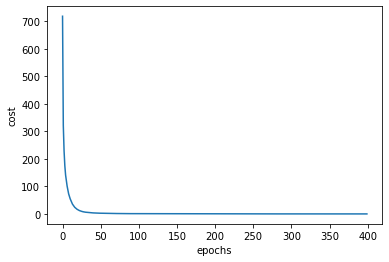

In [41]:
plot_cost()

In [ ]:
# Batch size = 32
# epochs = 400
# lr = 0.5

Starting testing...
Train Accuracy: 98.17 %
Test Error: 1.83 %